<a href="https://colab.research.google.com/github/TheAmirHK/SaarstahlAM_demo/blob/main/SaarAM_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

start_time = time.time()

In [19]:
customer_demands = [
    {"Type": "TGV", "Quantity": 120, "Length": 108000},
    {"Type": "TGV station", "Quantity": 50, "Length": 56000},
    {"Type": "OUI", "Quantity": 70, "Length": 32000},
    {"Type": "TER", "Quantity": 150, "Length": 18000},
    {"Type": "DB", "Quantity": 10, "Length": 18000},
    {"Type": "CFF", "Quantity": 100, "Length": 10000}
    ]

In [20]:
def generate_patterns(customer_demands, defect_vector):
    rail_length = len(defect_vector)
    lengths = sorted(list(set([c["Length"] for c in customer_demands])))
    length_to_type = {c["Length"]: c["Type"] for c in customer_demands}
    max_pieces = [int((rail_length) // l) for l in lengths]

    feasible_patterns = []

    for pattern in product(*(range(m + 1) for m in max_pieces)):
        total_length = sum(pattern[i] * lengths[i] for i in range(len(pattern)))
        if total_length <= rail_length and sum(pattern) > 0 and (rail_length - total_length) / rail_length <= 0.5 :

            items = []
            total_priority = 0
            for i, count in enumerate(pattern):
                if count > 0:
                    rail_type = length_to_type[lengths[i]]
                    items.extend([{"Type": rail_type, "Length": lengths[i]}] * count)

            start_pos = 0
            feasible_patterns.append({
                "items": items,
                "start": start_pos ,
                "end": (start_pos + int(total_length )),
                "waste": rail_length - total_length,
                "pattern": pattern,
                "total_length": total_length
            })

    return feasible_patterns

In [21]:
def print_info(patterns, max_print=2, more=True):
    print(f"Total feasible patternss generated: {len(patterns)}")
    for i, combination in enumerate(patterns[:max_print], 1):
        # Access the 'waste' key directly from the combination dictionary
        total_waste = combination['waste']
        print(f"Pattern {i}: Total Waste = {total_waste:.2f} (millimeters) ") # Removed priority as it's not calculated in generate_patterns
        if more:
            print(f"  Position: {combination['start']} to {combination['end']}")
            print(f"  Waste: {combination['waste']}")
            print("  Pieces:")
            for item in combination['items']:
                print(f"    - {item['Type']} (Length: {item['Length']})")
            print(f"  Pattern tuple: {combination['pattern']}")
            print(f"  Total length: {combination['total_length']}") # Removed priority and total_priority as it's not calculated in generate_patterns

In [22]:
def plot_patterns(defect_vector, patterns, max_plot=10):

    plt.figure(figsize=(18, 8))

    rail_length = len(defect_vector)

    defect_indices = np.where(defect_vector == 1)[0]
    defect_positions = defect_indices

    plt.barh(0, rail_length, left=0, height=0.5, color='lightgray', edgecolor='black')
    plt.text(rail_length / 2, 0, "Rail", va='center', ha='center')

    for pos in defect_positions:
        plt.barh(0, 1 , left=pos, height=0.5, color='red', alpha=0.7)

    for i, pattern in enumerate(patterns[:max_plot]):
        y_pos = -(i + 1) * 0.5
        color = plt.cm.tab20(i % 20)
        current_pos = pattern['start']
        for item in pattern['items']:
            plt.barh(y_pos + 0.05, item['Length'],
                    left=current_pos, height=0.3,
                    color=color, alpha=0.9, edgecolor='black')
            plt.text(current_pos + item['Length'] / 2, y_pos + 0.05,
                    f"{item['Type']} : {item['Length']}m",
                    va='center', ha='center', fontsize=8)
            current_pos += item['Length']

    plt.xlabel('Position on rail (meters)')
    plt.yticks([])
    plt.title(f'Feasible Cutting Patterns (Showing {min(max_plot, len(patterns))} of {len(patterns)})')
    plt.xlim(0, rail_length)
    plt.grid(True, axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

In [23]:
rail_length = [0]*115000
patterns = generate_patterns(customer_demands, rail_length)
sorted_list = sorted(patterns, key=lambda x: x['waste'], reverse=False )

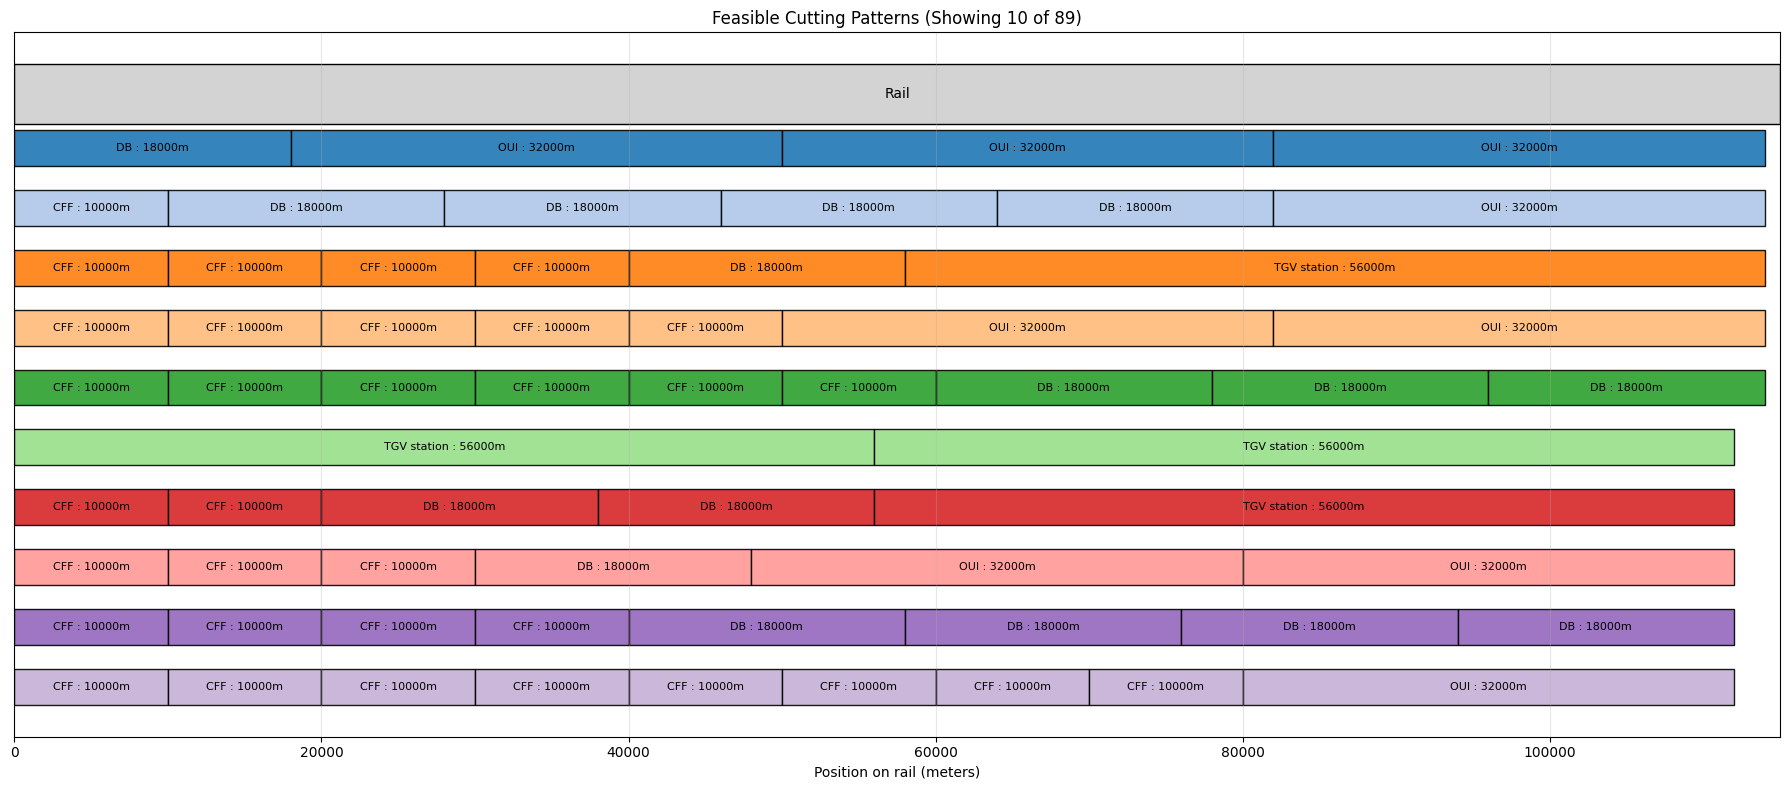

In [24]:
plot_patterns(rail_length, sorted_list)

In [25]:
print_info(sorted_list, max_print=1, more=True)

Total feasible patternss generated: 89
Pattern 1: Total Waste = 1000.00 (millimeters) 
  Position: 0 to 114000
  Waste: 1000
  Pieces:
    - DB (Length: 18000)
    - OUI (Length: 32000)
    - OUI (Length: 32000)
    - OUI (Length: 32000)
  Pattern tuple: (0, 1, 3, 0, 0)
  Total length: 114000


In [26]:
end_time = time.time()
execution_time = end_time - start_time
print(f"Code execution time: {execution_time:.2f} seconds")

Code execution time: 0.43 seconds
